# Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a closed-form solution  -- in other words, a mathematical equation that gives the result directly. This is closed the Normal Equation

\begin{equation}
    \hat{\theta} = (X^TX)^{-1} X^T y
\end{equation}

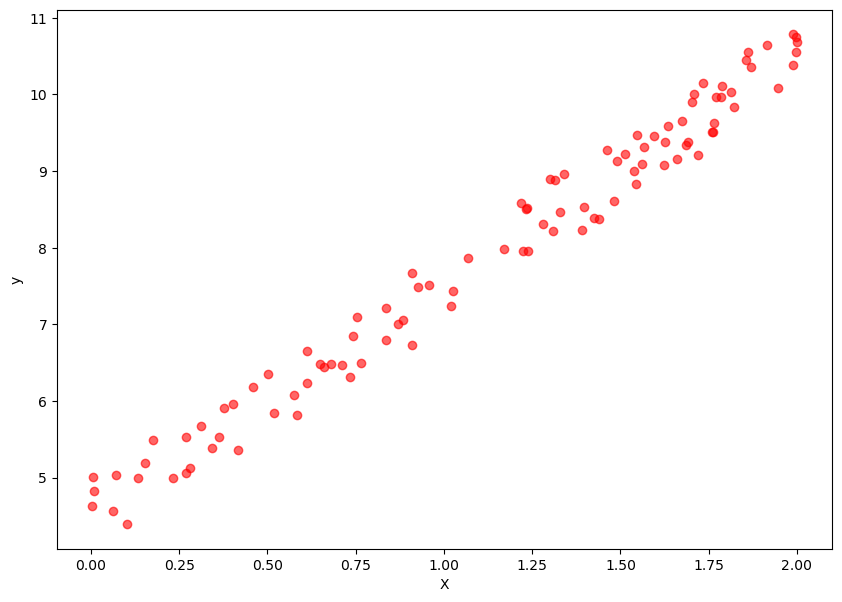

In [2]:
import numpy as np
from matplotlib import pyplot as plt
X = 2* np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.figure(figsize = (10,7))
plt.xlabel("X")
plt.ylabel('y')
plt.scatter(X, y, c = 'red', alpha = 0.6)

plt.show()

Now let's compute $\hat{\theta}$ using the Normal Equation. We will use the inv() function from Numpy's linear algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

In [3]:
X_b = np.c_[np.ones((100, 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.51976665],
       [3.01006889]])

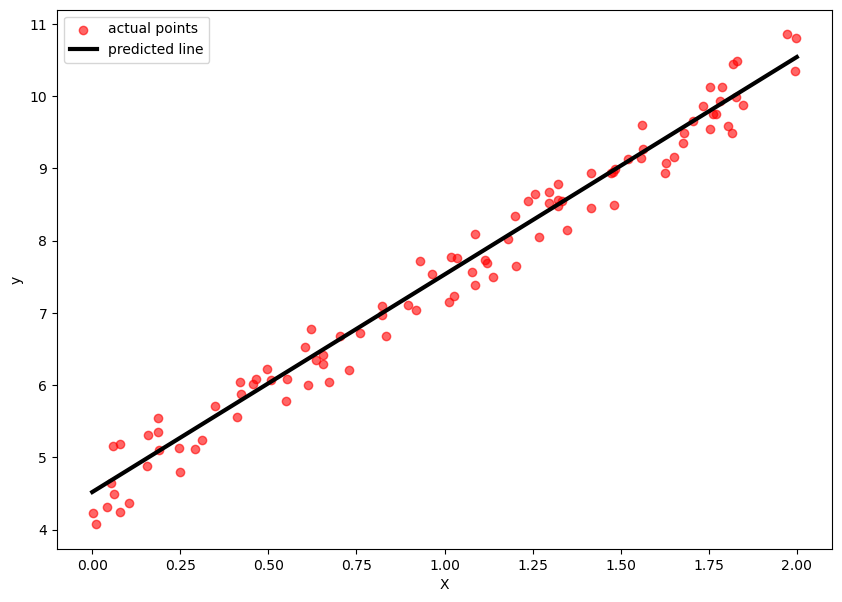

In [7]:
X = 2* np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.figure(figsize = (10,7))
plt.xlabel("X")
plt.ylabel('y')
plt.scatter(X, y, c = 'red', alpha = 0.6, label = 'actual points')
line_X = np.linspace(0, 2, 100)
line_y = theta_best[0] + theta_best[1]*line_X
plt.plot(line_X, line_y, "k-", linewidth = 3, label = 'predicted line')
plt.legend()
plt.show()

The Normal Equation computes the inverse of $X^T X$, which is an $(n + 1) \times (n + 1)$ matrix where $n$ is the number of features. The computational complexity of inverting such a function is typically about $O(n^{2.4})$ to $O(n^3)$, depending on the implementation. This means if the number of features are doubled, the complexity increases roughly by 8 times

# Linear Regression with Batch Gradient Descent

To implement gradient descent, you need to compute the gradient of the cost function with regard to each model parameter $\theta_j$.
$
    J(\theta) = \frac{1}{m}\sum_{i = 1}^{m}(\theta^Tx^{(i)} - y^{(i)})^2
$
where,
$
    h_\theta(x) = \theta^{T}x
$

$ MSE(\theta) = \frac{1}{m}\sum_{i = 1}^{m}(\theta^Tx^{(i)} - y^{(i)})^2$

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.4365818]), array([[3.04173469]]))

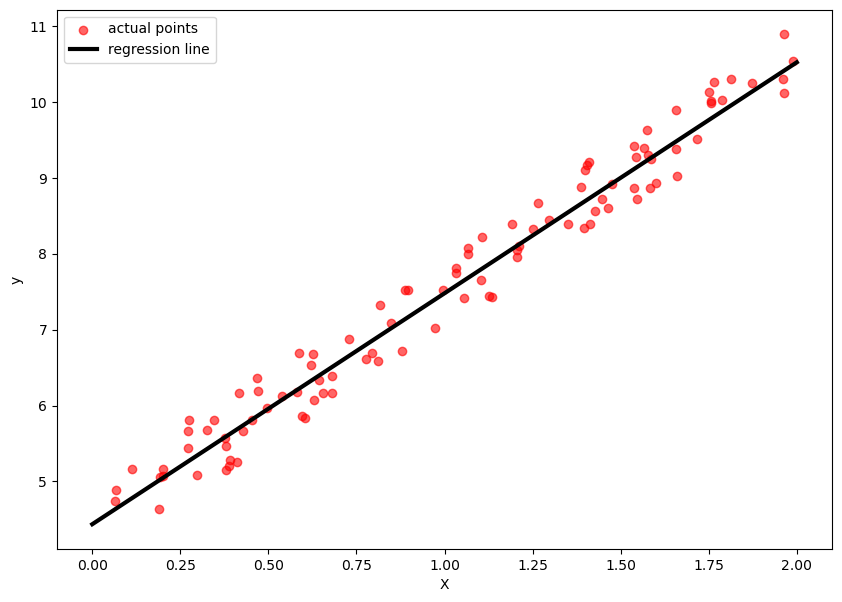

In [10]:
X = 2* np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.figure(figsize = (10,7))
plt.xlabel("X")
plt.ylabel('y')
plt.scatter(X, y, c = 'red', alpha = 0.6, label = 'actual points')
line_X = np.linspace(0, 2, 100)
line_y = lin_reg.intercept_ + lin_reg.coef_[0]*line_X
plt.plot(line_X, line_y, "k-", linewidth = 3, label = 'regression line')
plt.legend()
plt.show()

In [11]:
#predicting using linear regression
X_new = np.array([[0], [1], [2]])
lin_reg.predict(X_new)

array([[ 4.4365818 ],
       [ 7.4783165 ],
       [10.52005119]])

# Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute gradients at every step - thus making the training process very slow especially when the training set is large. Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.42492158]), array([3.07811375]))

# Mini-Batch Gradient Descent 

Mini-Batch GD computes gradients on small random sets of instances called mini-batches. 

# Polynomial Regression

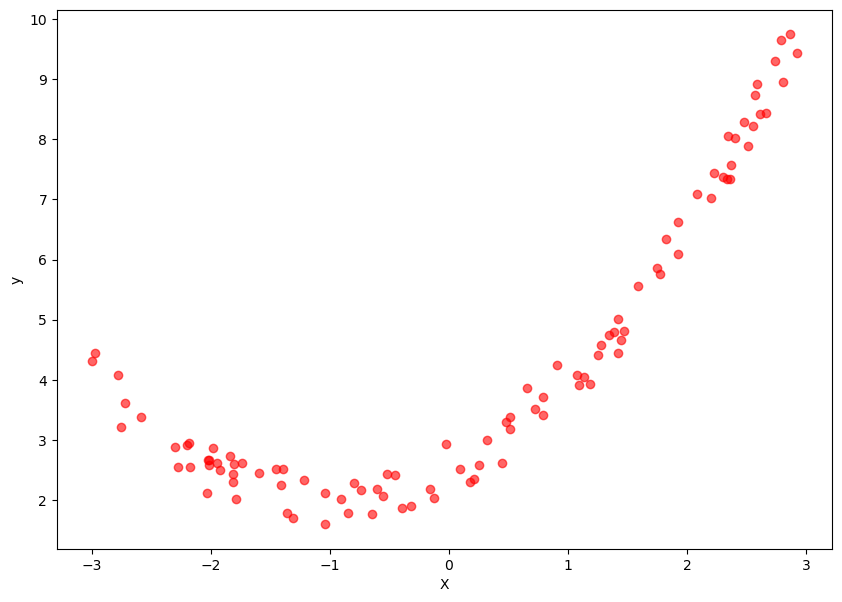

In [14]:
m = 100
X = 6* np.random.rand(m, 1) - 3
yP = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)
plt.figure(figsize = (10,7))
plt.xlabel("X")
plt.ylabel('y')
plt.scatter(X, yP, c = 'red', alpha = 0.6)
plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([0.5104783]), array([0.5104783 , 0.26058809]))

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, yP)
lin_reg.intercept_, lin_reg.coef_

(array([2.45409189]), array([[0.97787332, 0.52446238]]))

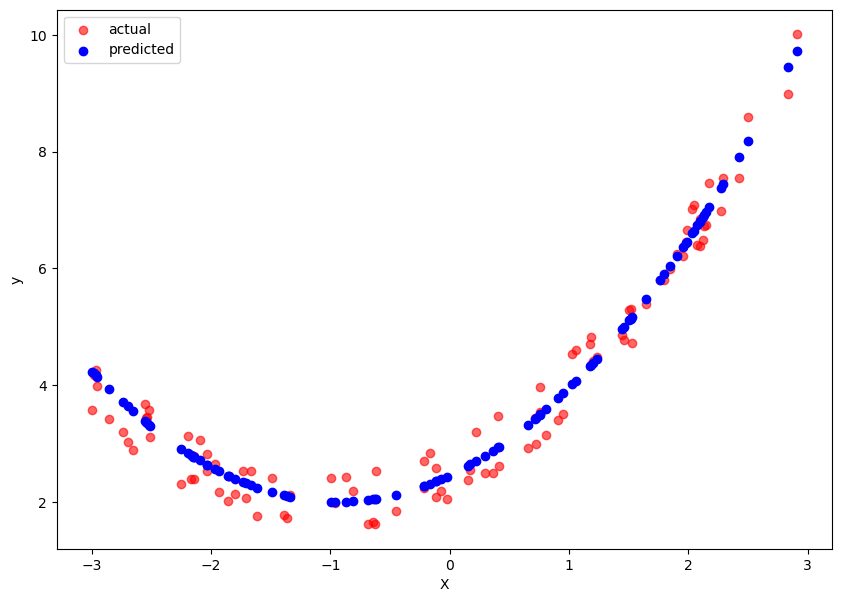

In [18]:
m = 100
X = 6* np.random.rand(m, 1) - 3
yP = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)
plt.figure(figsize = (10,7))
plt.xlabel("X")
plt.ylabel('y')
plt.scatter(X, yP, c = 'red', alpha = 0.6, label = 'actual')


fx = []
for i in X:
    y_pred = 2.45409189 + 0.97787332*X + 0.52446238*X*X
    fx.append(y_pred)

plt.scatter(X, y_pred, c = 'blue', label = 'predicted')
plt.legend()
plt.show()

# Learning Curves

In [ ]:
from IPython import display
display.Image('High-Degree-Poly-Reg.png') 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
 train_errors, val_errors = [], []
 for m in range(1, len(X_train)):
     model.fit(X_train[:m], y_train[:m])
     y_train_predict = model.predict(X_train[:m])
     y_val_predict = model.predict(X_val)
     train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
     val_errors.append(mean_squared_error(y_val, y_val_predict))
 plt.figure(figsize = (10, 10))
 plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
 plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
 plt.legend()
 plt.xlabel('Training Set Size')
 plt.ylabel('RMSE')
 plt.show()

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# Regularized Linear Models

# Ridge Regression / Tikhonov Regularization / L2 Regularization

We add a penalty term $\alpha \sum_{i=1}^{n}\theta_i^2$

$J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n}\theta_i^2$

This forces the learning algorithm to not only fit the data also keep the model weights as small as possible.

Closed Form Solution

$\hat{\theta} = (X^TX + \alpha A)^{-1} X^T y$

In [ ]:
from sklearn.linear_model import Ridge

X = 2* np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X, y)
intercept = ridge_reg.intercept_
slope = ridge_reg.coef_
intercept, slope

In [ ]:

plt.figure(figsize = (7, 6))
plt.xlabel('X')
plt.ylabel('y')

plt.scatter(X, y, label = 'original')
plt.plot(X, intercept + slope*X, color = 'red', label = 'ridge')
plt.legend()
plt.show()

In [ ]:
ridge_reg.predict([[1.5]])

In [ ]:
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())

intercept = sgd_reg.intercept_
slope = sgd_reg.coef_

plt.figure(figsize = (7, 6))
plt.xlabel('X')
plt.ylabel('y')

plt.scatter(X, y, label = 'original')
plt.plot(X, intercept + slope*X, color = 'red', label = 'ridge with SGD')
plt.legend()
plt.show()
intercept, slope

# LASSO Regression

LASSO - Least Absolute Shrinkage and Selection Operator Regression

Like that of Ridge Regression, it uses a pelty term/ regularization term

$J(\theta) = MSE(\theta) + \alpha \sum_{i = 1}^{n} |\theta_i|$

In [ ]:
from sklearn.linear_model import Lasso

X = 2* np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
intercept = lasso_reg.intercept_
slope = lasso_reg.coef_
intercept, slope

In [ ]:
plt.figure(figsize = (7, 6))
plt.xlabel('X')
plt.ylabel('y')

plt.scatter(X, y, label = 'original')
plt.plot(X, intercept + slope*X, color = 'red', label = 'lasso')
plt.legend()
plt.show()

In [ ]:
plot_learning_curves(lasso_reg, X, y)

In [ ]:
plot_learning_curves(ridge_reg, X, y)

In [ ]:
# LASSO Regression using SGD
sgd_reg = SGDRegressor(penalty = 'l1')
sgd_reg.fit(X, y.ravel())

intercept = sgd_reg.intercept_
slope = sgd_reg.coef_

plt.figure(figsize = (7, 6))
plt.xlabel('X')
plt.ylabel('y')

plt.scatter(X, y, label = 'original')
plt.plot(X, intercept + slope*X, color = 'red', label = 'Lasso with SGD')
plt.legend()
plt.show()
intercept, slope

In [ ]:
plot_learning_curves(sgd_reg, X, y.ravel())

# Elastic Net

Elastic net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a mix of both Lasso and Ridge. When $r = 0$, Elastic Net is equivalent to Ridge Regression while when $r = 1$, it behaves like a Lasso Regression

$J(\theta) = MSE(\theta) + r \alpha \sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2} \alpha \sum_{i=1}^{n}\theta_i^2$

In [ ]:
from sklearn.linear_model import ElasticNet

X = 2* np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
intercept = elastic_net.intercept_
slope = elastic_net.coef_
intercept, slope

In [ ]:
plt.figure(figsize = (7, 6))
plt.xlabel('X')
plt.ylabel('y')

plt.scatter(X, y, label = 'original')
plt.plot(X, intercept + slope*X, color = 'red', label = 'Elastic Net')
plt.legend()
plt.show()

In [ ]:
plot_learning_curves(elastic_net, X, y)

# Discussion

When should you use plain linear regression (i.e. without any regularization), Ridge Regression or Elastic Net?

 - It is almost always preferable to use at leat a little bit of regularization, so generally you should avoid plain linear regression
 
 - Ridge is a good default but, if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to use useless feature's weights down to zero